In [79]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

In [1]:
"""Goal: Use scraped dataframes to create plot charts explaining Disney's market share"""

"Goal: Use scraped dataframes to create plot charts explaining Disney's market share"

In [2]:
"""Chart 1: Box chart showing Disney's domination among top 50"""
"""The charts below tell the same story two different ways: Disney's reign(control? domination?) over the top 50 highest grossing 
movies. Disney is a story-telling machine, and the tales they weave dominate the conversation."""
"""How can I express this? I want to explain how Disney is a story telling machine, and the top 50 highest grossing are movies that 
dominate the cultural discussion, inso facto Disney controls the cultural conversation. """

'How can I express this? I want to explain how Disney is a story telling machine, and the top 50 highest grossing are movies that \ndominate the cultural discussion, inso facto Disney controls the cultural conversation. '

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.dates as Dates

<h1> Disney's Story Telling Empire </h1>
<p>
    Walt Disney has been a household name for generations. While long beloved for their animated films, in recent years Disney has stretched its story telling empire outside the familiar computer-generated fantasies of old. Major acquisitions of Marvel Studios (2009) and LucasFilms (2015) have led the charge. Just how big has Disney become, and how much does it matter?
    </p

<h1> Dominating the Cultural Conversation </h1>
<p> Seemingly every year another Marvel movie is released and proceeds to dominate the cultural conversation for weeks, occasionally months at a time. The highest grossing movie list is in constant flux, with every new Marvel release a threat to join the list. For purposes of this analysis, we will examine Rotten Tomatoes "Top 50 Highest Grossing Moive List". This list is home to the most-watched (and often most-discussed) films and franchises ever produced. The question we ask: how much of this list is Disney responsible for? In turn, how much does Disney drive our movie discussions?

<p> The two graphs below visualize Disney's domination of culturally impactful movies. In terms of raw box office gross, Disney is responsible for over 50% of the gross receipts from the highest-grossing movies. On a film count basis, 27 of the 50 moives that made the list were produced by Disney or one of its subsidiaries. 
    </p>

In [4]:
movies_studios_df = pd.read_csv(r'C:\Users\nlpru\Desktop\Disney_Market_share-master\Disney Project\movies_studios_df.csv')

In [5]:
y_values = movies_studios_df.groupby('Studio')['Box Office in $'].sum().sort_values(ascending  = False).values
x_values = movies_studios_df.groupby('Studio')['Box Office in $'].sum().sort_values(ascending  = False).apply(lambda x: '${:,}'.format(x)).index

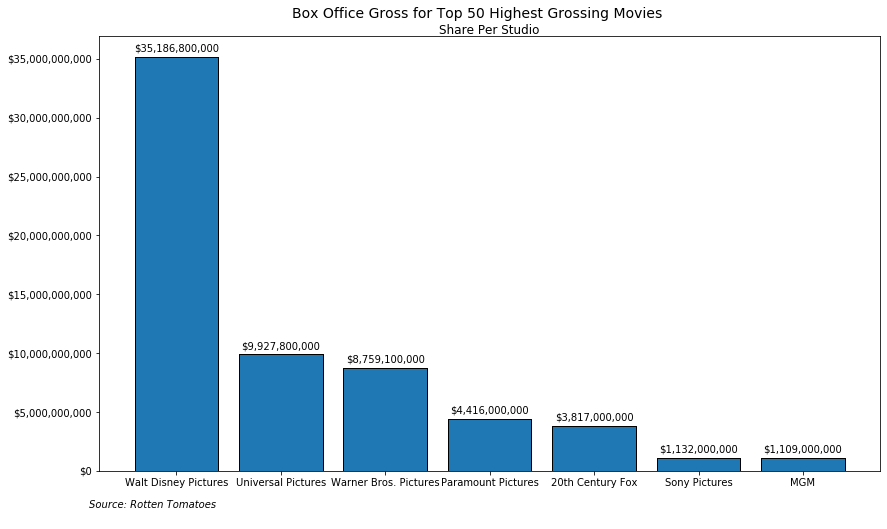

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.bar(x_values, y_values, color = 'blue', edgecolor = 'black')
ax.set_yticklabels(['${:,}'.format(int(y)) for y in ax.get_yticks()])
def autolabel(rects):
    """Nate Notes: Can you explain why this works?? Remember to understand annotate."""
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('${:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
rect = ax.bar(x_values, y_values, edgecolor = 'black')
fig.suptitle('Box Office Gross for Top 50 Highest Grossing Movies',fontsize= 14, y = .93)
ax.set_title('Share Per Studio', y = .99, fontsize = 12)
autolabel(rect)
ax.annotate('Source: Rotten Tomatoes', xy = (.1,.04), xycoords = 'figure fraction', fontstyle = 'italic', fontsize = 10)

plt.show()

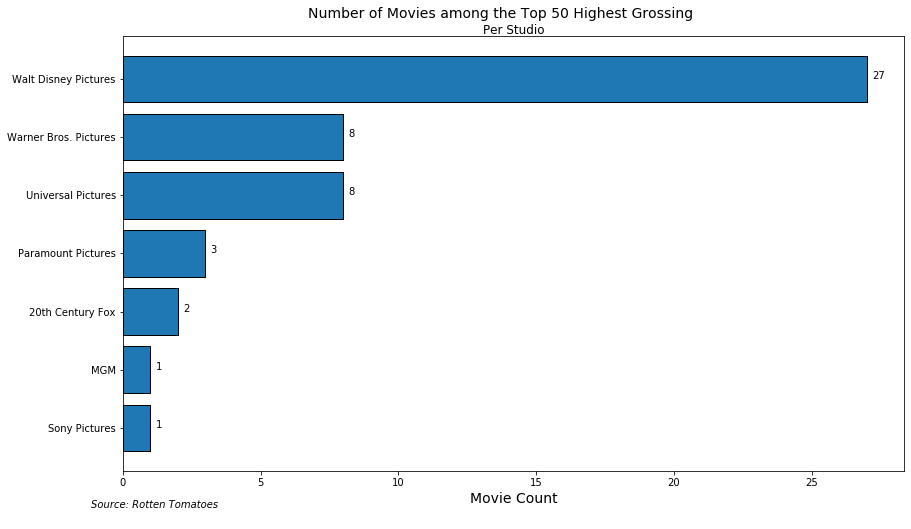

In [59]:
y_values_count = movies_studios_df['Studio'].value_counts()[::-1]
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.barh(y_values_count.index, y_values_count, color = 'blue',edgecolor = 'black')
def autolabel(rects):
    """Nate Notes: Can you explain why this works?? Remember to understand annotate."""
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(width,
                    xy=(width,rect.get_y() + rect.get_height() / 2),
                    xytext=(5,0),  # 3 points vertical offset
                    textcoords="offset points")
                    #ha='bottom', va='center')
rect = ax.barh(y_values_count.index, y_values_count, edgecolor = 'black')
autolabel(rect)
ax.set_xlabel('Movie Count', fontsize = 14)
fig.suptitle('Number of Movies among the Top 50 Highest Grossing', fontsize =14, y = .93)
ax.set_title('Per Studio', y = .99)
ax.annotate('Source: Rotten Tomatoes', xy = (.1,.04), xycoords = 'figure fraction', fontstyle = 'italic', fontsize = 10)

plt.show()

In [22]:
# Helper functions for Graph 3. Convert to datetime AND convert string to integer
def clean_market_share(percentage):
    """ Input parameter is percentage as string e.g. '19.5%' 
    Market Share is in a percentage, but reads as a string. Need to convert to int for matplotlib to handle properly"""
    return float(percentage.strip('%'))
def convert_to_datetime(year):
    """Convert the dates to datetime"""
    return datetime.date(int(year), 1, 1)
def convert_to_int(box_office):
    """Inflation adjusted values are in strings. Function converts to int"""
    return int(box_office.strip('$').replace(',',''))

In [24]:
"""Read in DataFrames"""
disney_df = pd.read_csv(r'C:\Users\nlpru\Desktop\Disney_Market_share-master\Disney Project\disney_df.csv')
domestic_bo_df = pd.read_csv(r'C:\Users\nlpru\Desktop\Disney_Market_share-master\Disney Project\domestic_box_office.csv')
sony_df = pd.read_csv(r'C:\Users\nlpru\Desktop\Disney_Market_share-master\Disney Project\sony_df.csv')
twentieth_century_fox_df = pd.read_csv(r'C:\Users\nlpru\Desktop\Disney_Market_share-master\Disney Project\twentieth_century_fox_df.csv')
universal_df = pd.read_csv(r'C:\Users\nlpru\Desktop\Disney_Market_share-master\Disney Project\universal_df.csv')
warner_bros_df = pd.read_csv(r'C:\Users\nlpru\Desktop\Disney_Market_share-master\Disney Project\warner_bros_df.csv')


In [30]:
"""Create a plotable Series where the inflation-adjusted box-office gross totals cumulatively build off each other
Reason is for presentation. We want the gross box office per studio adds up to 100%. The studios with higher market share will be near the top"""
tcentury_fox_plot_series = twentieth_century_fox_df['Inflation-Adjusted Gross'].apply(convert_to_int)
universal_plot_series = universal_df['Inflation-Adjusted Gross'].apply(convert_to_int) + tcentury_fox_plot_series
sony_plot_series = sony_df['Inflation-Adjusted Gross'].apply(convert_to_int) + universal_plot_series
warner_bros_plot_series = warner_bros_df['Inflation-Adjusted Gross'].apply(convert_to_int) + sony_plot_series
disney_plot_series = disney_df['Inflation-Adjusted Gross'].apply(convert_to_int) + warner_bros_plot_series
domestic_bo_plot_series = domestic_bo_df['Gross Inflation Adjusted Box Office'].apply(convert_to_int)

# Year (used for x-axis)
x_axis_year = disney_df['Year'].apply(convert_to_datetime)

<h1> Disney's Increaing Market Share </h1>
<p> 
    Disney's major purchases in the last decade plus (Pixar in 2006, Marvel Studios in 2009, LucasFilms in 2015) have been the driving force behind their increasing grip on the box office. While few predicted the Marvel Universe reaching the heights it has, LucasFilms Star Wars was a well-established name-brand before Disney purchased the studio in 2015. Disney has (so far) released five full-length Star Wars movies, with only the disappointing 'Solo: A Star Wars Story' failing to crack the Top 50 in gross. Disney's gross box office market share has risen over the past decade, even as gross box office sales have stayed flat or declined. Disney's acquisition of historical characters and stories has led this drive. 
    </p>
    <p>
    The first graph below illuistrates Disney's growing box office gross in comparison to both the industry at large and other major studios. The second graph drills down into Disney's market share, looking at percentage chage over the past decade.

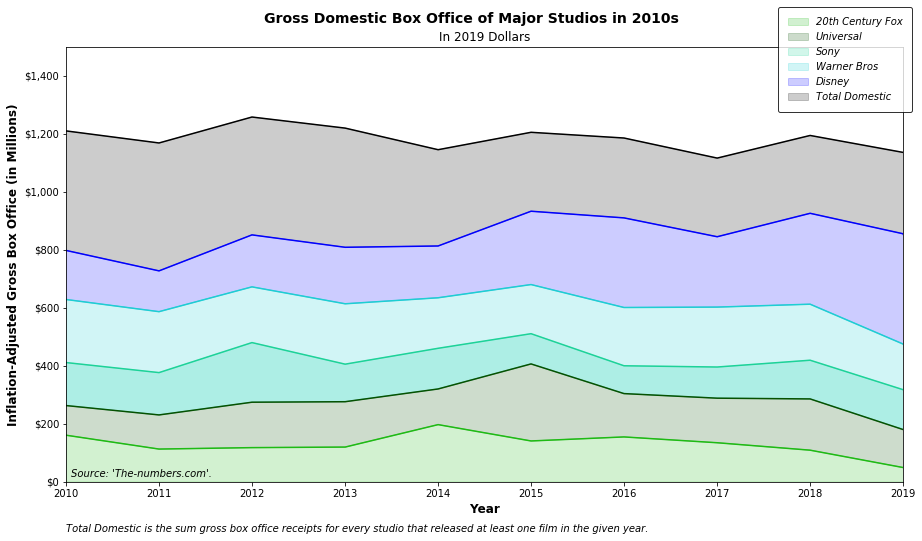

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.plot(x_axis_year, domestic_bo_plot_series, color = 'black')
ax.plot(x_axis_year, disney_plot_series, color = 'blue')
ax.plot(x_axis_year, warner_bros_plot_series, color = '#1DCFD2')
ax.plot(x_axis_year, sony_plot_series,color = '#1DD298')
ax.plot(x_axis_year, universal_plot_series,color = '#065101')
ax.plot(x_axis_year, tcentury_fox_plot_series, color = '#1EBB14')

"""Shade between lines, made to represent market share %. Note how Disneys increases in recent years"""
ax.fill_between(x_axis_year, tcentury_fox_plot_series, color = '#1EBB14', alpha = 0.2,  label = '20th Century Fox')
ax.fill_between(x_axis_year, universal_plot_series, tcentury_fox_plot_series, color = '#065101', alpha = 0.2, label = 'Universal')
ax.fill_between(x_axis_year, sony_plot_series, universal_plot_series, color = '#1DD298', alpha = 0.2, label = 'Sony')
ax.fill_between(x_axis_year, universal_plot_series, warner_bros_plot_series, color = '#1DCFD2', alpha = 0.2, label = 'Warner Bros')
ax.fill_between(x_axis_year, warner_bros_plot_series, disney_plot_series, color = 'blue', alpha = 0.2, label = 'Disney')
ax.fill_between(x_axis_year, domestic_bo_plot_series, disney_plot_series, color = 'black', alpha = 0.2, label = 'Total Domestic')

# Set x limits to only go from 2010 to 2019
ax.set_xlim(Dates.date2num(datetime.date(2010,1,1)), Dates.date2num(datetime.date(2019,1,1)))
#ax.set_xticks([datetime.date(x,1,1,) for x in range(1995,2020)])
#ax.set_xticklabels([x for x in range(1995,2020)])
ax.set_ylim(0, 15000000000)
ax.set_yticklabels(["${:,}".format(x) for x in [0, 200, 400, 600, 800, 1000, 1200, 1400]])
ax.set_ylabel('Inflation-Adjusted Gross Box Office (in Millions)', fontsize = 12, fontweight = 'bold')
ax.set_xlabel('Year', fontsize = 12, fontweight = 'bold')



"""Annotate 'Source' note in italitcs"""
ax.annotate("Source: 'The-numbers.com'.", xy = (5,5), xycoords = 'axes points', fontstyle = 'italic') 
ax.annotate("Total Domestic is the sum gross box office receipts for every studio that released at least one film in the given year.", 
           xy = (0, -50), xycoords = "axes points", fontstyle = 'italic')
ax.legend(loc = (.85,.85), edgecolor = 'inherit', prop = {'size':10,'style':'italic'}, borderpad = 1)
fig.suptitle('Gross Domestic Box Office of Major Studios in 2010s', fontsize = 14, fontweight = 'bold', y = 0.94)
ax.set_title('In 2019 Dollars', x = .5)
plt.show()

fig.savefig(r'C:\Users\nlpru\Desktop\Disney_Market_share-master\Disney Project\Box Office Market Share v3.0.png')


<p>Although Box Office Total has steadily fallen since its highs in the mid-2000s (potentially due to the advent of DVDs,
OnDemand, and eventually streaming), Disney's share of the market has increased, suggesting it is capturing revenue that 
previously went to other studios.
    </p>

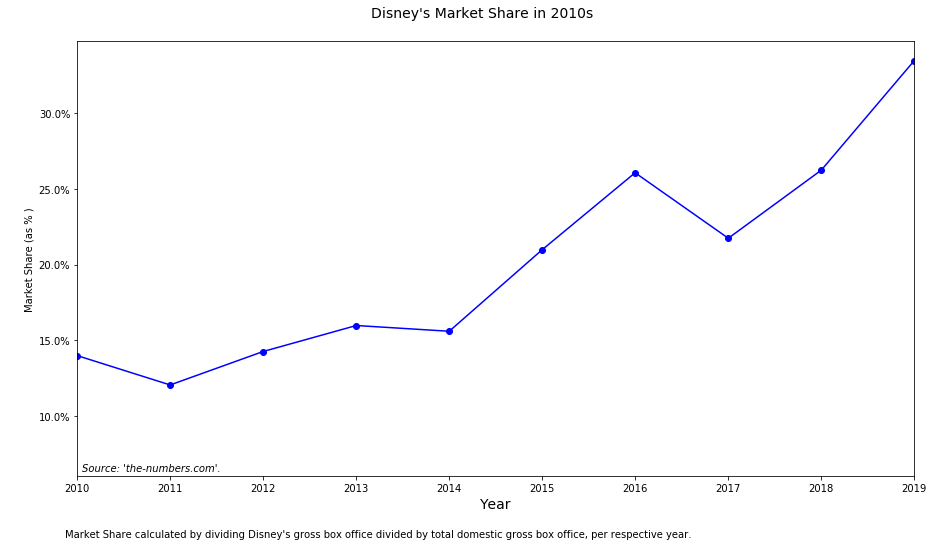

In [78]:
"""Graph 4: Disney's Rising Market Share as percentage. Use Disneys market share from past decade. """
disney_market_share = disney_df['Market Share'].apply(clean_market_share)
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.plot(x_axis_year, disney_market_share, marker = 'o', color = 'blue')
ax.set_xlim(Dates.date2num(datetime.date(2010,1,1)), Dates.date2num(datetime.date(2019,1,1)))

ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Market Share (as % )')

ax.set_yticklabels(['{}%'.format(y) for y in ax.get_yticks()])

ax.annotate('Source: \'the-numbers.com\'.', xy = (5,5), xycoords = 'axes points', fontstyle = 'italic')
ax.annotate('Market Share calculated by dividing Disney\'s gross box office divided by total domestic gross box office, per respective year.', 
            xy = (65,10)
           ,xycoords = 'figure points')

fig.suptitle('Disney\'s Market Share in 2010s', y = .94, fontsize = 14)

plt.show()

<h1> Is Disney's Domination Everlasting? </h1>
<p> Disney is in a powerful position. Controlling Marvels' and LucasFilms' universally recognized characters ensures they have the ability be craft stories for the forseeable future, with sequals and spinoffs already in the works for Marvel and Star Wars. While it may look like the Superhero craze will never end, genre's have defined the box office before. <a href = 'https://www.theatlantic.com/entertainment/archive/2014/06/the-return-of-the-western/372871/'> Between 1940 and 1960, up to 140 westerns were released <strong> per year </strong> </a>.While a western can still capture attention from time to time (Quinten Tarantion's <em> Django Unchained </em> comes to mind), the genre has certainly fallen from its Golden Era peak. Time will tell if superhero movies will follow the same path, but you can wager Disney will see its cash cows are milked to the last drop. </p>